In [13]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import alpha_vantage
from dotenv import load_dotenv
import os
from datetime import datetime, timedelta

In [14]:
# Suppress all future warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [15]:
# Define a list of stock symbols
stock_symbols = ["JNJ", "PG", "KO", "MCD", "T"]

# Define a list of stock names
stock_names = ["Johnson & Johnson", "Procter & Gamble", "Coca-Cola", "McDonald's", "AT&T"]

# Define a list of stock colors
stock_colors = ["blue", "orange", "green", "red", "purple"]

# Define a list of stock weights
stock_weights = [0.2, 0.2, 0.2, 0.2, 0.2]

# Define a list of stock prices
stock_prices = []

# Define a list of stock volumes
stock_volumes = []


In [16]:
# Define a function to pull stock data
def pull_stock_data(stock_symbol):
    # Define the timeframe
    start_date = datetime.now() - timedelta(days=365)
    end_date = datetime.now()

    # Pull the data
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

    # Append the stock price data
    stock_prices.append(stock_data["Adj Close"])

    # Append the stock volume data
    stock_volumes.append(stock_data["Volume"])



In [17]:
# Loop through the list of stock symbols
for stock_symbol in stock_symbols:
    pull_stock_data(stock_symbol)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [18]:
# Create a dictionary to store dividend history 
dividend_history = {}

In [19]:
# Fetch dividend history for each stock
for symbol in stock_symbols:
    ticker = yf.Ticker(symbol)
    dividend_history[symbol] = ticker.dividends

# Create a Pandas DataFrame to hold the closing prices
df_closing_prices = pd.DataFrame(
    {
        stock_symbols[0]: stock_prices[0],
        stock_symbols[1]: stock_prices[1],
        stock_symbols[2]: stock_prices[2],
        stock_symbols[3]: stock_prices[3],
        stock_symbols[4]: stock_prices[4]
    }
)

# Create a Pandas DataFrame to hold the trading volumes
df_trading_volumes = pd.DataFrame(
    {
        stock_symbols[0]: stock_volumes[0],
        stock_symbols[1]: stock_volumes[1],
        stock_symbols[2]: stock_volumes[2],
        stock_symbols[3]: stock_volumes[3],
        stock_symbols[4]: stock_volumes[4]
    }
)

# Display sample data
df_closing_prices.head()

,JNJ,PG,KO,MCD,T
Date,,,,,
2022-10-12,158.142273,121.254761,53.499779,231.894821,13.709083
2022-10-13,160.533493,123.086784,54.208065,241.373672,14.168239
2022-10-14,159.862808,121.888176,53.344536,237.861908,14.046421
2022-10-17,161.933243,124.090492,54.033417,241.109543,14.346279
2022-10-18,161.369476,125.094208,54.761105,243.760513,14.618024


<Axes: title={'center': 'Dividend History of DGIT Portfolio'}>

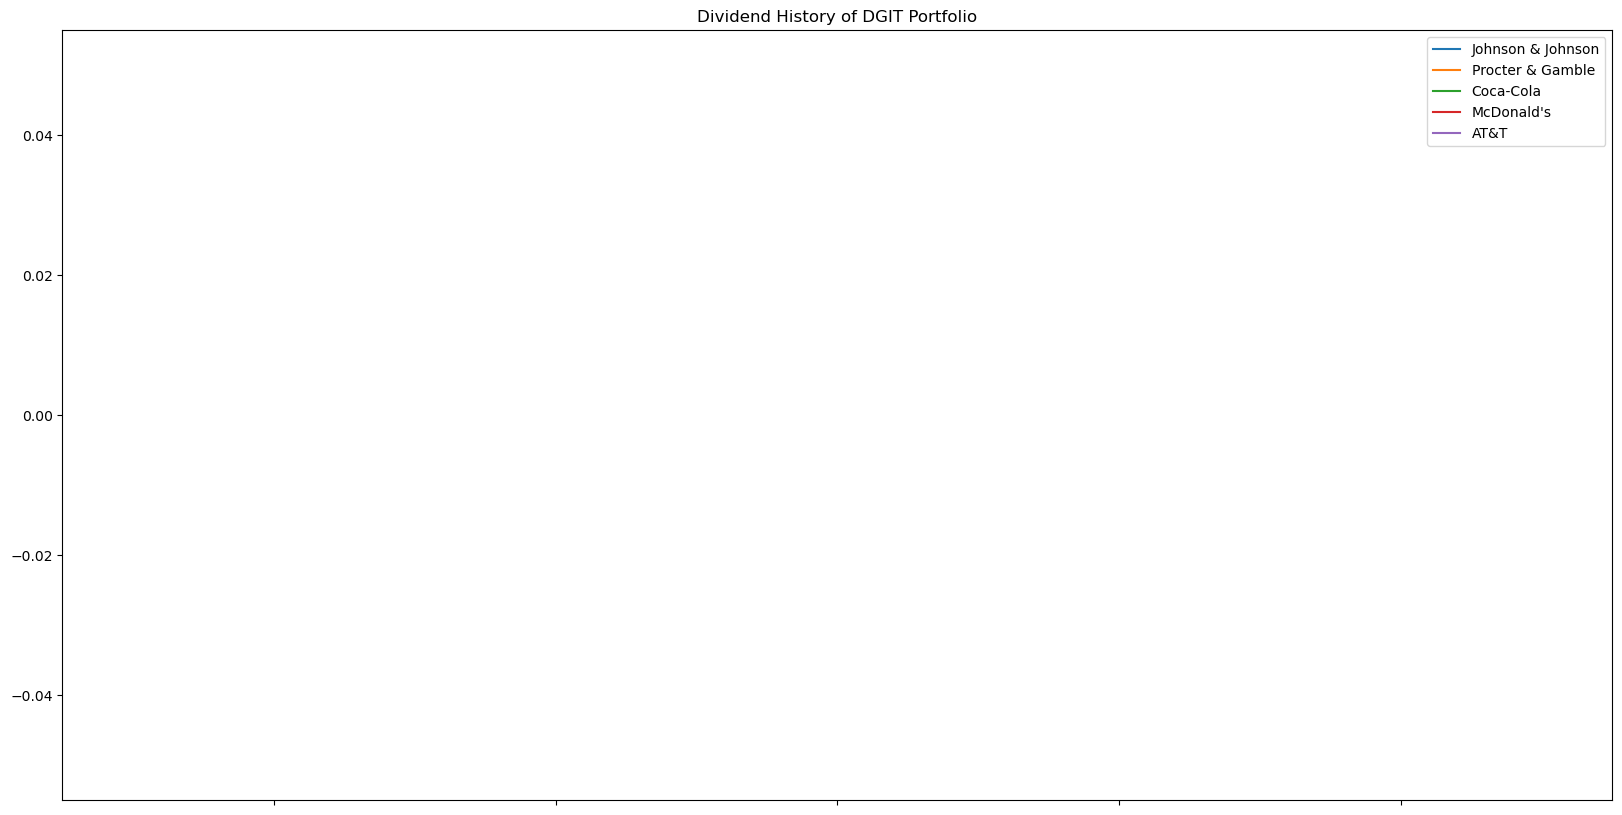

In [20]:
# Create a new dataframe
dividend_history_df = pd.DataFrame()

# Loop through the list of dividend histories
for stock_name, dividend_history in dividend_history.items():
    dividend_history_df = pd.concat([dividend_history_df, dividend_history], axis="columns", join="inner")

# Set the column names
dividend_history_df.columns = stock_names

# Plot the dividend history
dividend_history_df.plot(figsize=(20, 10), title="Dividend History of DGIT Portfolio")




In [21]:
# Define the date range for the past 5 years
start_date = datetime.now() - timedelta(days=5*365)
end_date = datetime.now()


In [22]:
# Create a new DataFrame to store the closing prices
df_closing_prices = pd.DataFrame()

# Start fetching data from 2018-01-01
start_date = "2018-01-01"

# End date is today
end_date = datetime.now()

# Fetch the closing prices for all the tickers
for symbol in stock_symbols:
    ticker = yf.Ticker(symbol)
    df_closing_prices[symbol] = ticker.history(start=start_date, end=end_date)['Close']

In [23]:
# Display sample data
df_closing_prices

,JNJ,PG,KO,MCD,T
Date,,,,,
2018-01-02 00:00:00-05:00,119.342957,77.640846,37.955708,151.390381,18.058529
2018-01-03 00:00:00-05:00,120.482986,77.546631,37.872356,150.752396,17.641512
2018-01-04 00:00:00-05:00,120.474403,78.094780,38.405785,151.809891,17.805508
2018-01-05 00:00:00-05:00,121.468742,78.146179,38.397449,152.115799,17.871105
2018-01-08 00:00:00-05:00,121.623032,78.557281,38.339108,152.010864,17.922646
...,...,...,...,...,...
2023-10-05 00:00:00-04:00,157.139999,143.800003,52.380001,252.229996,14.552000
2023-10-06 00:00:00-04:00,157.639999,144.089996,53.139999,248.220001,14.450000
2023-10-09 00:00:00-04:00,158.539993,143.360001,52.880001,249.919998,14.730000


In [24]:
# Fetch dividend history for each stock
for symbol in stock_symbols:
    ticker = yf.Ticker(symbol)
    dividend_history[symbol] = ticker.dividends


    
# Filter data for the past 5 years
for symbol in stock_symbols:
    dividend_history[symbol] = dividend_history[symbol].loc[start_date:end_date]

# Display sample data
display(dividend_history["JNJ"].head())




# Create a new DataFrame from the dictionary of dividends
dividend_df = pd.DataFrame(dividend_history)

# Display the first rows of the DataFrame
display(dividend_df.head())


# Plot the data for each stock
dividend_df.plot(title="Dividend History")


   
    

Date
2018-02-26 00:00:00-05:00    0.84
2018-05-25 00:00:00-04:00    0.90
2018-08-27 00:00:00-04:00    0.90
2018-11-26 00:00:00-05:00    0.90
2019-02-25 00:00:00-05:00    0.90
Name: Dividends, dtype: float64

,Dividends
Date,
1984-03-26 00:00:00-05:00,0.116667
1984-06-25 00:00:00-04:00,0.116667
1984-09-24 00:00:00-04:00,0.116667
1985-01-04 00:00:00-05:00,0.116667
1985-04-03 00:00:00-05:00,0.125


TypeError: no numeric data to plot

In [25]:
# Create an empty dictionary to store the stock data
stock_data = {}

In [26]:
# Fetch the stock data for each stock symbol
for symbol in stock_symbols:
    stock = yf.Ticker(symbol)
    stock_data[symbol] = {
        "Company Name": stock.info.get("longName"),
        "Current Price": stock.history(period="1d")["Close"][0],
        "Dividend Yield": stock.info.get("trailingAnnualDividendYield"),
        "Dividend History": stock.dividends,
    }

In [27]:
# Print the retrieved data for each stock
for symbol, data in stock_data.items():
    print(f"Stock Symbol: {symbol}")
    print(f"Company Name: {data['Company Name']}")
    print(f"Current Price: ${data['Current Price']:.2f}")
    print(f"Dividend Yield: {data['Dividend Yield'] * 100:.2f}%")
    print(f"Dividend History:\n{data['Dividend History']}\n")

Stock Symbol: JNJ
Company Name: Johnson & Johnson
Current Price: $156.18
Dividend Yield: 2.89%
Dividend History:
Series([], Name: Dividends, dtype: float64)

Stock Symbol: PG
Company Name: The Procter & Gamble Company
Current Price: $143.00
Dividend Yield: 2.54%
Dividend History:
Series([], Name: Dividends, dtype: float64)

Stock Symbol: KO
Company Name: The Coca-Cola Company
Current Price: $53.71
Dividend Yield: 3.33%
Dividend History:
Series([], Name: Dividends, dtype: float64)

Stock Symbol: MCD
Company Name: McDonald's Corporation
Current Price: $250.92
Dividend Yield: 2.36%
Dividend History:
Series([], Name: Dividends, dtype: float64)

Stock Symbol: T
Company Name: AT&T Inc.
Current Price: $14.77
Dividend Yield: 7.42%
Dividend History:
Series([], Name: Dividends, dtype: float64)

